In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('max_columns', 1000)
from tqdm import tqdm

from AddXy import GetXY

XY = GetXY(Create = False)
#Coverages = XY.Runit()
Coverages = pd.read_csv("Cleaned_Coverages.csv", index_col=0)
Coverages

,Year,week,gameId,playId,nflId,displayName,position,PlayerTeam,OppTeam,Target,route,quarter,down,yardsToGo,YardLine_std,Team_Score,Opp_Score,Score_diff,gameClock,passResult,offensePlayResult,epa,coverage,DistFromCenter,DistFromSideline,Y_Std_first,Distfrom_LOSX,Distfrom_LOSY,WR_Location,LeftSideOfField_first,Location,Hash,Old_route,FastMotion,Touchdown,Shotgun,DropType,RPO,Play_Action,Screen,Players_on_side,Num_WRs,Num_TEs,Num_RBs,Total_Pos,Num_WRs_On_side,Num_TEs_On_side,Num_RBs_On_side,Total_Pos_On_side,Pos_On_side_Ratio,X_Depth,Y_Depth,Target_side,On_Target_side,Players_On_Target_side,Inv,Success,NewCoverage,NewCoverage_cat,PointA,PointB,PointC,PointD,Num_WRs_On_targetside,Num_TEs_On_targetside,Num_RBs_On_targetside,Pos_Ratio_targetside,Play_contains_motion,Motion_targetside,Motion_target,Loc_route,Target_side_routes,Back_side_routes,Target_Route,Target_Pos,Target_Loc,Target_on_StrongSide,Max_Slot_loc,Symmetrical,Target_on_farside,Target_on_weakside,Rollout,Rollout_farside,Rollout_weakside,Target_Player_X,Target_Player_Y,Dist_from_Tar,In_play,Y_Depth_test,X_Depth_level,Y_Numbers,XY_level,Loc_Xdepth,Loc_YNum,Loc_XY,DropType2,gameClock_half,RZ,I10,I5,Dist_Bin,Target_side_route,Back_side_route,Target_route,Side,Side_route,Side_routes,Target_Side_Route,Side_routes_Inplay,routes_Inplay,Target_Player,Target_ID
6,2020,1,2793,15,3951.0,Will Fuller V,WR,Texans,Chiefs,1,GO,1,2,5,30,0.0,0.0,0.0,866.0,0.0,0,-0.900218,Cover 1,NaN,NaN,NaN,18.0,NaN,1.0,1.0,Outside,R,Fade - Back Shoulder,0.0,0.0,1.0,3 Step,0.0,0.0,0.0,2.0,2,2,1,5,1.0,1.0,0.0,2.0,0.4,28.362400,-21.948709,1.0,1,2,False,0,Cov1,1,"(-27.948709060960027, 22.362400453287247)","(-27.948709060960027, 34.36240045328725)","(-15.948709060960027, 34.36240045328725)","(-15.948709060960027, 22.362400453287247)",1.0,1.0,0.0,0.4,0,0,0,1GO,"1GO,2HITCH","10HITCH,1GO,2OUT",1GO,WR,1GO,0,2,0,1.0,0.0,0,0,0,28.362400,-21.948709,0.000000,1,21.948709,D,Out,Out_D,1D,1Out,1Out_D,3 Step,416.0,0,0,0,2,"GO,HITCH","GO,HITCH,OUT",GO,A,A_GO,"A_GO,A_HITCH,B_GO,B_HITCH,B_OUT",A_GO,"A_GO,A_HITCH","GO,HITCH",Will Fuller V,Will Fuller V
7,2020,1,2793,15,6528.0,Jordan Akins,TE,Texans,Chiefs,0,HITCH,1,2,5,30,0.0,0.0,0.0,866.0,0.0,0,-0.900218,Cover 1,NaN,NaN,NaN,18.0,NaN,2.0,1.0,Slot,R,Curl,0.0,0.0,1.0,3 Step,0.0,0.0,0.0,2.0,2,2,1,5,1.0,1.0,0.0,2.0,0.4,6.116564,-6.556293,1.0,1,2,False,0,Cov1,1,"(-12.556292917206974, 0.11656351879170668)","(-12.556292917206974, 12.116563518791708)","(-0.5562929172069744, 12.116563518791708)","(-0.5562929172069744, 0.11656351879170668)",1.0,1.0,0.0,0.4,0,0,0,2HITCH,"1GO,2HITCH","10HITCH,1GO,2OUT",1GO,WR,1GO,0,2,0,1.0,0.0,0,0,0,28.362400,-21.948709,27.051871,1,6.556293,S,Out,Out_S,2S,2Out,2Out_S,3 Step,416.0,0,0,0,2,"GO,HITCH","GO,HITCH,OUT",GO,A,A_HITCH,"A_GO,A_HITCH,B_GO,B_HITCH,B_OUT",A_GO,"A_GO,A_HITCH","GO,HITCH",Will Fuller V,Will Fuller V
8,2020,1,2793,15,876.0,Brandin Cooks,WR,Texans,Chiefs,0,GO,1,2,5,30,0.0,0.0,0.0,866.0,0.0,0,-0.900218,Cover 1,NaN,NaN,NaN,18.0,NaN,1.0,0.0,Outside,R,Go/Fly,0.0,0.0,1.0,3 Step,0.0,0.0,0.0,2.0,2,2,1,5,1.0,1.0,0.0,2.0,0.4,28.362400,21.948709,1.0,0,2,False,0,Cov1,1,"(15.948709060960027, 22.362400453287247)","(15.948709060960027, 34.36240045328725)","(27.948709060960027, 34.36240045328725)","(27.948709060960027, 22.362400453287247)",1.0,1.0,0.0,0.4,0,0,0,1GO,"1GO,2HITCH","10HITCH,1GO,2OUT",1GO,WR,1GO,0,1,0,1.0,0.0,0,0,0,28.362400,-21.948709,43.897418,0,21.948709,D,Out,Out_D,1D,1Out,1Out_D,3 Step,416.0,0,0,0,2,"GO,HITCH","GO,HITCH,OUT",GO,B,B_GO,"A_GO,A_HITCH,B_GO,B_HITCH,B_OUT",A_GO,"A_GO,A_HITCH","GO,HITCH",Will Fuller V,Will Fuller V
9,2020,1,2793,15,1430.0,Darren Fells,TE,Texans,Chiefs,0,OUT,1,2,5,30,0.0,0.0,0.0,866.0,0.0,0,-0.900218,Cover 1,NaN,NaN,NaN,18.0,NaN,2.0,0.0,Slot,R,Out,0.0,0.0,1.0,3 Step,0.0,0.0,0.0,2.0,2,2,1,5,1.0,1.0,0.0,2.0,0.4,6.066400,15.252205,1.0,0,2,False,0,Cov1,1,"(9.252205334545126, 0.06639971854312421)","(9.252205334545126, 12.066399718543124)","(21.252205334545124, 12.066399718543124)","(21.252205334545124, 0.06639971854

In [2]:
routes1 = Coverages.query('Location == "Outside"').groupby(['Old_route','route'])[['X_Depth','Y_Depth_test']].mean().reset_index().sort_values(by=['route']).rename(columns={'route':'New route', 'Old_route':'Old route','Y_Depth_test':'Avg. Y Depth','X_Depth':'Avg. X Depth'}).reset_index(drop=True)
routes1['Avg. X Depth'] = np.round(routes1['Avg. X Depth'],2)
routes1['Avg. Y Depth'] = np.round(routes1['Avg. Y Depth'],2)
routes1 = routes1.groupby(['New route'])[['Avg. X Depth','Avg. Y Depth']].mean().reset_index().sort_values(by=['New route'])
routes1

,New route,Avg. X Depth,Avg. Y Depth
0,ANGLE,6.320000,-0.650000
1,BENEATH,-1.000000,-7.640000
2,BUBBLE,-1.810000,14.920000
3,COMEBACK,12.830000,22.180000
4,CORNER,20.500000,19.840000
5,CORNERPOST,25.840000,3.940000
6,DEEPCROSS,15.290000,-11.650000
7,DIG,12.150000,4.970000
8,DRAG,3.475000,-7.610000
9,FLAT,-0.583750,9.675000


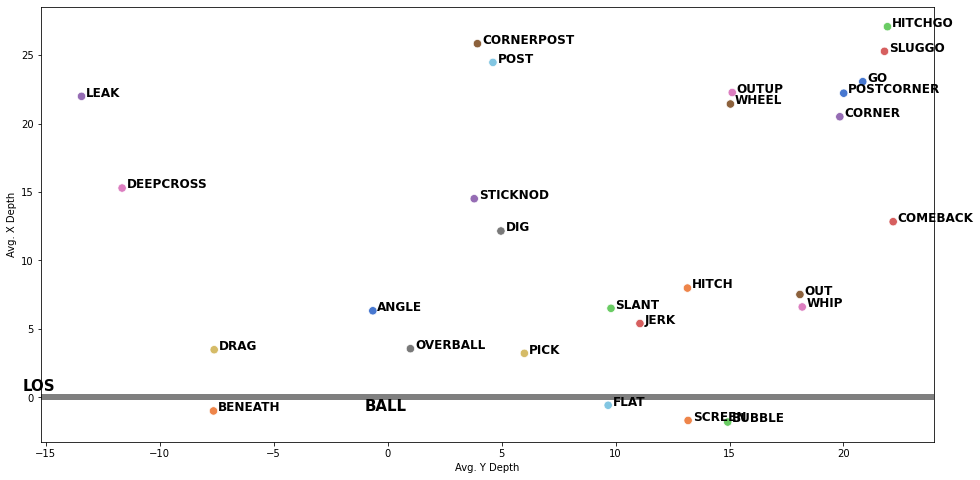

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
import seaborn as sns 

fig, ax = plt.subplots()

fig.set_size_inches(16,8)

# basic plot
sns.scatterplot(data=routes1, x="Avg. Y Depth", y="Avg. X Depth", marker="o", hue='New route',s=70,palette="muted" )
 
# add annotations one by one with a loop
for line in range(0,routes1.shape[0]):
     plt.text(routes1["Avg. Y Depth"][line]+0.2, routes1["Avg. X Depth"][line], routes1['New route'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

plt.axhline(y=0, color='black', linestyle='-',linewidth=6,alpha=.5)
plt.text(x=-16, y=.5, s= "LOS", size=15, color='black', weight='bold')
plt.text(x=0-1, y=0-1, s= "BALL", size=15, color='black', weight='bold')
ax.get_legend().remove()
plt.savefig('All_Routes_Plot.png', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.305, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_fontsize(13)
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

Newroute_table = render_mpl_table(routes1, header_columns=0, col_width=2.7)
plt.savefig('All_Routes.png', bbox_inches='tight')
Newroute_table

In [5]:
Relative = XY.GetRelativePlayers(Coverages)
Relative

100%|██████████| 69800/69800 [00:03<00:00, 21684.43it/s]


,Year,week,gameId,playId,nflId,displayName,route,tar_pos,Target,TmDist_1,CT1,TmDist_2,CT2,TmDist_3,CT3,TmDist_4,CT4,TmDist_5,CT5
0,2020,1,2793,15,3951.0,Will Fuller V,GO,WR,1,27.051871,6528.0,36.654836,2455.0,43.370724,1430.0,43.897418,876.0,NaN,NaN
1,2020,1,2793,15,6528.0,Jordan Akins,HITCH,TE,0,11.012544,2455.0,21.808556,1430.0,27.051871,3951.0,36.158158,876.0,NaN,NaN
2,2020,1,2793,15,876.0,Brandin Cooks,GO,WR,0,23.279923,1430.0,31.857985,2455.0,36.158158,6528.0,43.897418,3951.0,NaN,NaN
3,2020,1,2793,15,1430.0,Darren Fells,OUT,TE,0,12.135040,2455.0,21.808556,6528.0,23.279923,876.0,43.370724,3951.0,NaN,NaN
4,2020,1,2793,15,2455.0,David Johnson,HITCH,RB,0,11.012544,6528.0,12.135040,1430.0,31.857985,876.0,36.654836,3951.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69795,2020,17,3048,855,6360.0,Richie James Jr.,GO,WR,0,5.004718,6624.0,11.529147,6627.0,26.137161,4912.0,30.754464,5199.0,NaN,NaN
69796,2020,17,3048,855,6627.0,Ross Dwelley,DRAG,TE,0,6.830032,6624.0,11.529147,6360.0,15.007308,4912.0,19.544988,5199.0,NaN,NaN
69797,2020,17,3048,855,4912.0,Kendrick Bourne,SLANT,WR,0,4.628187,5199.0,15.007308,6627.0,21.780211,6624.0,26.137161,6360.0,NaN,NaN
69798,2020,17,3048,855,5199.0,River Cracraft,SLANT,WR,0,4.628187,4912.0,19.544988,6627.0,26.348241,6624.0,30.754464,6360.0,NaN,NaN


In [6]:
Doubles = XY.FindDoubles(Coverages,Relative)
Triples = XY.FindTriples(Coverages,Relative)
Quads = XY.FindQuads(Coverages,Relative)

100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


In [7]:
examples1 =Coverages.query('gameId == 2793 & playId == 425').filter(['gameId','playId','epa','displayName','Target','route','position','Dist_from_Tar'], axis=1)
examples1.columns = ['gameId','playId','epa','displayName','Target','route','position','Exp_Dist_from_Tar']
examples1

,gameId,playId,epa,displayName,Target,route,position,Exp_Dist_from_Tar
390,2793,425,0.693953,Demarcus Robinson,0,SLANT,WR,5.288011
391,2793,425,0.693953,Sammy Watkins,1,SLANT,WR,0.000000
392,2793,425,0.693953,Tyreek Hill,0,DIG,WR,7.437969
393,2793,425,0.693953,Clyde Edwards-Helaire,0,OUT,RB,9.761561
394,2793,425,0.693953,Travis Kelce,0,OUT,TE,20.340507


In [8]:
examples = Doubles.query('gameId == 2793 & playId == 425').head(50).filter(['gameId','playId','epa','targetName','tar_pos','tar_route','route1','position1','On_Target_side1','TmDist1'], axis=1)
examples.columns = ['gameId','playId','epa','targetName','tar_pos','tar_route','route2','position2','On_Tar_side','Exp_Dist_from_Tar']
examples

,gameId,playId,epa,targetName,tar_pos,tar_route,route2,position2,On_Tar_side,Exp_Dist_from_Tar
83,2793,425,0.693953,Sammy Watkins,WR,SLANT,DIG,WR,1,7.437969
84,2793,425,0.693953,Sammy Watkins,WR,SLANT,SLANT,WR,1,5.288011
85,2793,425,0.693953,Sammy Watkins,WR,SLANT,OUT,RB,0,9.761561


In [ ]:
def render_mpl_table(data, col_width=3.0, row_height=0.28, font_size=13,
                    header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                    bbox=[0, 0, 1, 1], header_columns=0,
                    ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_fontsize(15)
            cell.set_facecolor(header_color)
        else:
         #   cell.set_text_props(weight='bold')
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
import seaborn as sns 

def render_mpl_table(data, col_width=3.0, row_height=0.28, font_size=13,
                    header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                    bbox=[0, 0, 1, 1], header_columns=0,
                    ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_fontsize(15)
            cell.set_facecolor(header_color)
        else:
         #   cell.set_text_props(weight='bold')
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

twins = Doubles.groupby(['Routes'])['epa'].count().reset_index().rename(columns={'epa':'count'}).sort_values(by=['count'], ascending=False).reset_index(drop=True)#.iloc[80:200]
Newroute_table = render_mpl_table(twins, header_columns=-1, col_width=3.5)
plt.savefig('twins_Routes1.png', bbox_inches='tight')
Newroute_table

In [9]:
from Modeling import InitiateModel

Initiate = InitiateModel()
X_train, X_test, y_train, y_test, categorical_features_indices = Initiate.CreateData(Triples, 'epa',route_combo="ThreeMan")
X_train

['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']


,Play_Action,RZ,WR_Location2,Dist_Bin,route2,down,On_Target_side1,Location1,Location2,Routes,position1,Positions,NewCoverage,Target_on_farside,tar_WR_Location,Shotgun,route1,Rollout,tar_Location,tar_pos,position2,On_Target_side2,WR_Location1,tar_route
28109,0,0,1,2,DIG,3,0,Outside,Outside,"DIG,DRAG,FLAT",TE,"RB,TE,WR",Cov1,1,4,1,DRAG,0,Slot,RB,WR,1,1,FLAT
16983,0,0,2,3,GO,3,0,Backfield,Slot,"DIG,DRAG,GO",RB,"RB,TE,WR",Cov4,1,3,1,DIG,0,Slot,TE,WR,1,10,DRAG
384,0,1,2,2,FLAT,2,0,Outside,Slot,"DIG,DRAG,FLAT",WR,"RB,TE,WR",Cov4,0,1,1,DRAG,0,Outside,TE,RB,0,1,DIG
29582,0,0,1,3,OUT,2,1,Slot,Outside,"FLAT,HITCH,OUT",TE,"RB,TE,WR",Other,1,10,1,HITCH,0,Backfield,RB,WR,1,2,FLAT
35430,0,0,1,3,HITCH,2,0,Backfield,Outside,"DIG,FLAT,HITCH",RB,"RB,TE,WR",Cov4,0,1,1,FLAT,0,Outside,TE,WR,0,10,DIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0,0,1,3,SLANT,1,1,Outside,Outside,"SLANT,SLANT,SLANT",WR,"WR,WR,WR",Cov6,1,2,1,SLANT,0,Slot,WR,WR,0,1,SLANT
11534,0,0,1,3,OUT,1,0,Slot,Outside,"HITCH,HITCH,OUT",WR,"RB,WR,WR",Cov3,0,10,1,HITCH,0,Backfield,RB,WR,0,3,HITCH
22179,0,0,1,2,DIG,3,0,Slot,Outside,"DIG,DIG,FLAT",TE,"RB,TE,WR",Cov6,0,10,1,DIG,0,Backfield,RB,WR,1,3,FLAT
40089,0,0,2,3,GO,3,0,Outside,Slot,"DIG,DRAG,GO",WR,"WR,WR,WR",Cov4,1,1,1,DRAG,0,Outside,WR,WR,1,1,DIG


In [6]:
dfs = [[Doubles, "TwoMan"],[Triples, "ThreeMan"]]
vars = ['Success', 'epa']
for i1,j1 in dfs:
    for v in vars:
        for i in range(1,6):
            Initiate.Model(i1, v, i, j1)

['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan Success 1


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.685
log_loss: 0.588
Recall: 0.46205821205821207
roc_auc_score: 0.6432614227065883
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan Success 2


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.683
log_loss: 0.593
Recall: 0.4407484407484408
roc_auc_score: 0.637149041918672
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan Success 3


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.684
log_loss: 0.593
Recall: 0.4594594594594595
roc_auc_score: 0.6416375817738569
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan Success 4


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.689
log_loss: 0.589
Recall: 0.45114345114345117
roc_auc_score: 0.643968870282952
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan Success 5


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.69
log_loss: 0.585
Recall: 0.446985446985447
roc_auc_score: 0.6439988883207572
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan epa 1


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3917614738165445
MAE: 1.008
R2: 0.03292075229263636
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan epa 2


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3228756555322954
MAE: 0.972
R2: 0.06537560387074381
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan epa 3


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3270267518026906
MAE: 0.975
R2: 0.04063747265731377
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan epa 4


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.334541119636259
MAE: 0.981
R2: 0.055179532864553016
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']
TwoMan epa 5


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3330416347586447
MAE: 0.979
R2: 0.05855303846748938
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan Success 1


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.672
log_loss: 0.601
Recall: 0.42317073170731706
roc_auc_score: 0.6217387624935417
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan Success 2


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.694
log_loss: 0.58
Recall: 0.4475609756097561
roc_auc_score: 0.644525557198596
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan Success 3


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.708
log_loss: 0.583
Recall: 0.44878048780487806
roc_auc_score: 0.6560922161449517
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan Success 4


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.698
log_loss: 0.581
Recall: 0.45365853658536587
roc_auc_score: 0.6490352580662403
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan Success 5


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
Accuracy: 0.687
log_loss: 0.593
Recall: 0.43902439024390244
roc_auc_score: 0.6369701936610308
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan epa 1


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.317952958189328
MAE: 0.966
R2: 0.026441827781524707
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan epa 2


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.2930583900195691
MAE: 0.952
R2: 0.05423301242397027
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan epa 3


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3258959235173777
MAE: 0.951
R2: 0.035819570583090266
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan epa 4


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.2918978287774927
MAE: 0.947
R2: 0.02911625224989578
['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']
ThreeMan epa 5


C:\ProgramData\Miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


----------Test----------
RMSE: 1.3364131097830492
MAE: 0.961
R2: 0.040847668843440044


## 2-Man Concepts

In [7]:
def CreateXDoubles(df):
    Cols = ['NewCoverage','tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 
        'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']


    X = df[Cols]

    X = X.fillna(-999)

    int_cols = ['tar_WR_Location', 'WR_Location1','down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'Shotgun', 'Play_Action','On_Target_side1']

    for cat in int_cols:
        X[cat] = X[cat].astype('int')


    cat_cols = ['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 
                'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1', 'Routes', 'Positions']


    for cat in cat_cols:
        X[cat] = X[cat].astype('category')


    for cat in cat_cols:
        X[cat] = X[cat].astype(str)
    return X

In [8]:
from tqdm import tqdm
from itertools import product

def Combinations(df):
    Rollout = [0, 1]
    Target_on_farside = [0, 1]
    tar_pos = ["WR", "TE"]
    Shotgun = [0, 1]
    Play_Action = [0, 1]
    On_Target_side1 = [0, 1]
    tar_Location = [1, 2, 3]
    position1 = ["WR", "TE"]
    Location1 =  [1, 2, 3]

    All_dfs = []

    for r, tf, tp, s, pa, ots, tl, p1, l1 in tqdm(product(Rollout, Target_on_farside, tar_pos, Shotgun, Play_Action, On_Target_side1, tar_Location, position1, Location1)):
        AllRoutes = df[['tar_route','route1']].drop_duplicates()
        AllRoutes['Rollout'] = r
        AllRoutes['Target_on_farside'] = tf
        AllRoutes['tar_pos'] = tp
        AllRoutes['Shotgun'] = s
        AllRoutes['Play_Action'] = pa
        AllRoutes['On_Target_side1'] = ots
        AllRoutes['tar_WR_Location'] = tl
        AllRoutes['position1'] = p1
        AllRoutes['WR_Location1'] = l1
        All_dfs.append(AllRoutes)
    
    All_dfs = pd.concat(All_dfs)

    All_dfs = All_dfs.loc[~((All_dfs['WR_Location1'] == All_dfs['tar_WR_Location']) & (All_dfs['On_Target_side1'] == 1)) ]

    All_dfs['tar_Location'] = np.where(All_dfs['tar_WR_Location'] == 1, "Outside", "Slot")
    All_dfs['Location1'] = np.where(All_dfs['WR_Location1'] == 1, "Outside", "Slot")

    All_dfs['Positions'] = All_dfs['tar_pos'] + "," + All_dfs['position1']
    All_dfs['Positions'] = All_dfs['Positions'].map(lambda x: ','.join(sorted(x.split(','))))

    All_dfs['Routes'] = All_dfs['tar_route'] + "," + All_dfs['route1']
    All_dfs['Routes'] = All_dfs['Routes'].map(lambda x: ','.join(sorted(x.split(','))))
    return All_dfs

Combos = Combinations(Doubles)
Combos

1152it [00:06, 181.45it/s]


,tar_route,route1,Rollout,Target_on_farside,tar_pos,Shotgun,Play_Action,On_Target_side1,tar_WR_Location,position1,WR_Location1,tar_Location,Location1,Positions,Routes
2,GO,HITCH,0,0,WR,0,0,0,1,WR,1,Outside,Outside,"WR,WR","GO,HITCH"
3,FLAT,HITCH,0,0,WR,0,0,0,1,WR,1,Outside,Outside,"WR,WR","FLAT,HITCH"
5,FLAT,DIG,0,0,WR,0,0,0,1,WR,1,Outside,Outside,"WR,WR","DIG,FLAT"
6,FLAT,SLANT,0,0,WR,0,0,0,1,WR,1,Outside,Outside,"WR,WR","FLAT,SLANT"
10,HITCH,POST,0,0,WR,0,0,0,1,WR,1,Outside,Outside,"WR,WR","HITCH,POST"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,WHIP,CORNER,1,1,TE,1,1,1,3,TE,2,Slot,Slot,"TE,TE","CORNER,WHIP"
2727,POST,DRAG,1,1,TE,1,1,1,3,TE,2,Slot,Slot,"TE,TE","DRAG,POST"
2733,CORNER,DEEPCROSS,1,1,TE,1,1,1,3,TE,2,Slot,Slot,"TE,TE","CORNER,DEEPCROSS"
3516,OVERBALL,DRAG,1,1,TE,1,1,1,3,TE,2,Slot,Slot,"TE,TE","DRAG,OVERBALL"


In [63]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import pickle



def Createpreds(cov, type1, d, binz):
    Coverage = cov
    Type = type1
    Down = d
    Dist_Bin = binz

    Combos['NewCoverage'] = Coverage
    Combos['down'] = Down
    Combos['Dist_Bin'] = Dist_Bin
    Combos['RZ'] = '0'
 #   Combos['YardLine_std'] = 50
    Routes = Combos.drop_duplicates()

    for i in tqdm(range(1,6)):
        succ = pickle.load(open("Models/All/" + Type + "_Success_" + str(i) + ".pkl", 'rb'))
        epa = pickle.load(open("Models/All/" + Type + "_epa_" + str(i) + ".pkl", 'rb'))
        X = CreateXDoubles(Combos)
        Routes['succ_'+str(i)] = succ.predict_proba(X)[:,-1]
        Routes['epa_'+str(i)] = epa.predict(X)
        
    Routes['epa_mean'] = (Routes['epa_1'] + Routes['epa_2'] + Routes['epa_3']+ Routes['epa_4']+ Routes['epa_5']) / 5
    Routes['succ_mean'] = (Routes['succ_1'] + Routes['succ_2'] + Routes['succ_3']+ Routes['succ_4']+ Routes['succ_5']) / 5

    from sklearn.preprocessing import MinMaxScaler
    scale = MinMaxScaler()
    Routes[['epa_mean','succ_mean']] = scale.fit_transform(Routes[['epa_mean','succ_mean']])

    if Down == 1 & Dist_Bin == 3:
        Routes['Score'] = Routes['epa_mean']*.75 +  Routes['succ_mean']*.25
    if Down == 2 & Dist_Bin == 2:
        Routes['Score'] = Routes['epa_mean']*.5 +  Routes['succ_mean']*.5
    if Down == 3 & Dist_Bin == 1:
        Routes['Score'] = Routes['epa_mean']*.25 +  Routes['succ_mean']*.75
    else:
        Routes['Score'] = Routes['epa_mean']*.5 +  Routes['succ_mean']*.5

    Routes = Routes.sort_values(by=['Score'], ascending=False)
    if type1 == 'TwoMan':
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[0] == Routes['tar_route'],"tar1","tar2")
    if type1 == 'ThreeMan':   
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[0] == Routes['tar_route'],"tar1","tar2")
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[-1] == Routes['tar_route'],"tar3",Routes['Target_num'])
    Routes['Target_num'] = Routes['Target_num'].fillna("tar2")
    Routes['Coverage'] = cov
    Routes['type'] = type1
    return Routes

#['NewCoverage', 'YardLine_std', 'tar_WR_Location', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 'position1', 'route1', 'Location1','WR_Location1', 
#            'Routes','Positions']

Covss = ['Cov0','Cov1','Cov2','Cov2Man','Cov3','Cov4']
Covss = ['Cov1','Cov3']
types = ['TwoMan']
types = ['ThreeMan']
types = [[1,3],[2,2],[3,1]]
types = [[1,3],[2,2],[3,1]]

Routes = Createpreds('Cov2Man', 'TwoMan', 3, 1)
Routes

100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


,tar_route,route1,Rollout,Target_on_farside,tar_pos,Shotgun,Play_Action,On_Target_side1,tar_WR_Location,position1,WR_Location1,tar_Location,Location1,Positions,Routes,NewCoverage,down,Dist_Bin,RZ,succ_1,epa_1,succ_2,epa_2,succ_3,epa_3,succ_4,epa_4,succ_5,epa_5,epa_mean,succ_mean,Score,Target_num,Coverage,type
1589,HITCH,COMEBACK,0,0,TE,1,1,0,3,WR,3,Slot,Slot,"TE,WR","COMEBACK,HITCH",Cov2Man,3,1,0,0.849062,0.854175,0.822432,0.488059,0.847270,0.942891,0.806228,0.334910,0.859321,1.042470,0.980566,0.957352,0.968959,tar2,Cov2Man,TwoMan
1589,HITCH,COMEBACK,0,0,TE,1,0,0,3,WR,3,Slot,Slot,"TE,WR","COMEBACK,HITCH",Cov2Man,3,1,0,0.852792,0.854175,0.810665,0.465680,0.800726,0.942891,0.810563,0.352537,0.838883,1.160881,0.996147,0.932044,0.964095,tar2,Cov2Man,TwoMan
1589,HITCH,COMEBACK,0,1,TE,1,1,0,3,WR,3,Slot,Slot,"TE,WR","COMEBACK,HITCH",Cov2Man,3,1,0,0.854635,0.855277,0.826117,0.446240,0.842643,0.892598,0.807907,0.332942,0.850741,1.030959,0.966243,0.956540,0.961391,tar2,Cov2Man,TwoMan
1589,HITCH,COMEBACK,0,1,TE,1,0,0,3,WR,3,Slot,Slot,"TE,WR","COMEBACK,HITCH",Cov2Man,3,1,0,0.858250,0.855277,0.814539,0.423862,0.795030,0.892598,0.812213,0.350569,0.829304,1.149370,0.981823,0.930507,0.956165,tar2,Cov2Man,TwoMan
1589,HITCH,COMEBACK,0,0,WR,1,1,0,3,TE,3,Slot,Slot,"TE,WR","COMEBACK,HITCH",Cov2Man,3,1,0,0.831531,0.926292,0.773014,0.543405,0.791102,0.762028,0.791773,0.503262,0.863818,1.069283,1.000000,0.909705,0.954852,tar2,Cov2Man,TwoMan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,OVERBALL,HITCH,0,1,TE,1,1,0,2,TE,1,Slot,Outside,"TE,TE","HITCH,OVERBALL",Cov2Man,3,1,0,0.250147,-0.620891,0.205898,-0.759470,0.482235,-0.805112,0.322454,-0.095578,0.435147,-0.582619,0.085935,0.066373,0.076154,tar2,Cov2Man,TwoMan
231,OVERBALL,HITCH,1,0,TE,1,1,1,2,TE,1,Slot,Outside,"TE,TE","HITCH,OVERBALL",Cov2Man,3,1,0,0.217629,-0.756855,0.224272,-0.638771,0.463215,-0.850574,0.380023,-0.041161,0.459756,-0.723414,0.065769,0.083922,0.074846,tar2,Cov2Man,TwoMan
231,OVERBALL,HITCH,1,0,TE,1,1,0,2,TE,1,Slot,Outside,"TE,TE","HITCH,OVERBALL",Cov2Man,3,1,0,0.218883,-0.754162,0.225273,-0.681828,0.467252,-0.867976,0.378883,-0.041345,0.458249,-0.723414,0.057825,0.085227,0.071526,tar2,Cov2Man,TwoMan
231,OVERBALL,HITCH,1,1,TE,1,1,1,2,TE,1,Slot,Outside,"TE,TE","HITCH,OVERBALL",Cov2Man,3,1,0,0.220059,-0.789421,0.223282,-0.697970,0.456020,-0.788926,0.381259,-0.137522,0.467979,-0.694390,0.052410,0.085249,0.068829,tar2,Cov2Man,TwoMan


In [84]:
def GetPivots(df): 
    pivot = pd.pivot_table(Routes, values=['Score'], index=['Routes2','On_Target_side1'],columns=['Target_num'], aggfunc={'Score': [np.mean],
                                                                                                                        }).reset_index()
    pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
    pivot['Score_mean_tar2'] = np.where(pivot['Routes2__'].str.split(',').str[0] == pivot['Routes2__'].str.split(',').str[1],pivot['Score_mean_tar1'],pivot['Score_mean_tar2'])
#    pivot['Score_mean_tar2'] = np.where(pivot['Routes2__'].str.split(',').str[1] == pivot['Routes__'].str.split(',').str[2],pivot['Score_mean_tar3'],pivot['Score_mean_tar2'])
    pivot['Avg_score'] =  pivot[['Score_mean_tar1','Score_mean_tar2']].mean(skipna=True, axis=1)
    pivot = pivot.sort_values(by=['Avg_score'], ascending=False)
    Top5 = pivot.head(10)
    pivot.sort_values(by=['Avg_score'], ascending=False)

    l = []

    for i, row in tqdm(Top5.iterrows()):
        rs = row['Routes2__']
        vals = GetSpecs(Routes, rs)#.reset_index()
        row = pd.DataFrame(row).T.reset_index(drop=True)
        row.columns = ['Routes','On_Target_side1','Score_mean_tar1','Score_mean_tar2','Avg_score']
        row['Score_mean_tar1'] = np.round(row['Score_mean_tar1'].astype(float), 3)
        row['Score_mean_tar2'] = np.round(row['Score_mean_tar2'].astype(float), 3)
    #    row['Score_mean_tar3'] = np.round(row['Score_mean_tar3'].astype(float), 3)
        row['Score_mean_tar1'] = row['Score_mean_tar1'].fillna(row['Score_mean_tar2'])
        row['Avg_score'] = np.round(row['Avg_score'].astype(float), 3)
        row = row.set_index(['Routes'])
        row = row.join(vals).reset_index()
        l.append(row)

    l = pd.concat(l)
    return l

GetPivots(Routes)

10it [00:00, 16.44it/s]


,Routes,On_Target_side1,Score_mean_tar1,Score_mean_tar2,Avg_score,Coverage,type,down,Dist_Bin,Target on Farside,Add Rollout,Target is WR,Add Shotgun,Add Play Action
0,"HITCH_3,HITCH_3",0,0.830,0.830,0.830,Cov2Man,TwoMan,3,1,-0.000839,-0.030731,0.034789,0.009173,0.006552
0,"HITCH_2,HITCH_3",1,0.743,0.822,0.783,Cov2Man,TwoMan,3,1,0.000892,-0.032829,0.017882,0.005953,0.015965
0,"HITCH_2,HITCH_3",0,0.741,0.820,0.780,Cov2Man,TwoMan,3,1,0.000892,-0.032829,0.017882,0.005953,0.015965
0,"HITCH_1,HITCH_3",1,0.672,0.790,0.731,Cov2Man,TwoMan,3,1,0.002693,-0.036268,0.006512,0.002747,0.015270
0,"HITCH_2,HITCH_2",0,0.730,0.730,0.730,Cov2Man,TwoMan,3,1,0.002674,-0.035550,0.002476,0.003406,0.020123
0,"HITCH_1,HITCH_3",0,0.668,0.788,0.728,Cov2Man,TwoMan,3,1,0.002693,-0.036268,0.006512,0.002747,0.015270
0,"HITCH_1,HITCH_2",1,0.672,0.698,0.685,Cov2Man,TwoMan,3,1,0.004635,-0.037507,-0.003651,0.001447,0.019903
0,"HITCH_1,HITCH_2",0,0.668,0.696,0.682,Cov2Man,TwoMan,3,1,0.004635,-0.037507,-0.003651,0.001447,0.019903
0,"FLAT,HITCH",1,0.559,0.770,0.664,Cov2Man,TwoMan,3,1,-0.008265,-0.011619,-0.011015,-0.021990,0.015135
0,"FLAT,HITCH",0,0.556,0.767,0.662,Cov2Man,TwoMan,3,1,-0.008265,-0.011619,-0.011015,-0.021990,0.015135


In [89]:
from itertools import product
Covss = ['Cov0','Cov1','Cov2','Cov2Man','Cov3','Cov4']
#Covss = ['Cov1']
types = ['TwoMan']
#types = ['ThreeMan']
#dds = [[1,3],[2,2],[3,1]]
dds = [[1,3],[3,1]]

All = []

for c, t, dd in tqdm(product(Covss, types, dds)):
    Routes = Createpreds(c, t, dd[0], dd[1])
    Routes['route1_alt'] = np.where((Routes['tar_route'] == Routes['route1']), Routes['route1']+"_"+Routes['WR_Location1'].astype(str), Routes['route1'])
    Routes['tar_route_alt'] = np.where((Routes['tar_route'] == Routes['route1']), Routes['tar_route']+"_"+Routes['tar_WR_Location'].astype(str), Routes['tar_route'])
    Routes['Routes2'] = Routes['tar_route_alt'] + "," + Routes['route1_alt']
    Routes['Routes2'] = Routes['Routes2'].map(lambda x: ','.join(sorted(x.split(','))))
    Routes['Target_num'] = np.where(Routes['Routes2'].str.split(',').str[0] == Routes['tar_route_alt'],"tar1","tar2")
    samples = GetPivots(Routes)
    samples.columns = ['Routes', 'On Target side', 'tar1 Score', 'tar2 Score', 'Avg. Score', 'Coverage', 'type', 'down', 'Distance Bin', 'Target on Farside', 'Add Rollout', 'Target is WR', 'Add Shotgun', 'Add Play Action']
    All.append(samples)

All = pd.concat(All)
All

100%|██████████| 5/5 [00:10<00:00,  2.02s/it]
10it [00:00, 14.21it/s]
100%|██████████| 5/5 [00:10<00:00,  2.02s/it]
10it [00:00, 14.88it/s]
100%|██████████| 5/5 [00:10<00:00,  2.02s/it]
10it [00:00, 14.32it/s]
100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
10it [00:00, 14.97it/s]
100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
10it [00:00, 15.13it/s]
100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
10it [00:00, 15.90it/s]
100%|██████████| 5/5 [00:10<00:00,  2.03s/it]
10it [00:00, 15.48it/s]
100%|██████████| 5/5 [00:10<00:00,  2.03s/it]
10it [00:00, 15.02it/s]
100%|██████████| 5/5 [00:10<00:00,  2.00s/it]
10it [00:00, 14.81it/s]
100%|██████████| 5/5 [00:10<00:00,  2.02s/it]
10it [00:00, 15.24it/s]
100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
10it [00:00, 13.87it/s]
100%|██████████| 5/5 [00:10<00:00,  2.02s/it]
10it [00:00, 15.08it/s]
12it [02:24, 12.02s/it]


,Routes,On Target side,tar1 Score,tar2 Score,Avg. Score,Coverage,type,down,Distance Bin,Target on Farside,Add Rollout,Target is WR,Add Shotgun,Add Play Action
0,"SLANT_2,SLANT_2",0,0.668,0.668,0.668,Cov0,TwoMan,1,3,0.004236,-0.011991,0.014148,-0.073572,0.012718
0,"DEEPCROSS,DIG",0,0.779,0.501,0.640,Cov0,TwoMan,1,3,0.007469,-0.014405,0.090879,-0.039743,0.003485
0,"DEEPCROSS,DIG",1,0.778,0.502,0.640,Cov0,TwoMan,1,3,0.007469,-0.014405,0.090879,-0.039743,0.003485
0,"DEEPCROSS,POST",0,0.805,0.469,0.637,Cov0,TwoMan,1,3,0.011670,-0.008685,0.019738,-0.024472,-0.010483
0,"DEEPCROSS,POST",1,0.802,0.471,0.637,Cov0,TwoMan,1,3,0.011670,-0.008685,0.019738,-0.024472,-0.010483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"OUT_2,OUT_2",0,0.696,0.696,0.696,Cov4,TwoMan,3,1,-0.003691,-0.061590,0.005642,-0.016987,0.031494
0,"OUT_1,OUT_3",1,0.566,0.809,0.688,Cov4,TwoMan,3,1,0.000495,-0.056128,-0.011656,-0.023305,0.023276
0,"OUT_1,OUT_3",0,0.564,0.807,0.686,Cov4,TwoMan,3,1,0.000495,-0.056128,-0.011656,-0.023305,0.023276
0,"DIG,OUT",1,0.579,0.713,0.646,Cov4,TwoMan,3,1,0.003416,-0.064280,0.010673,-0.008612,0.025948


In [90]:
All.to_csv("Top_2_Man_Concepts.csv")

## 3 Man Concepts

In [93]:
def CreateXTriples(df):
    Cols = ['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 
            'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']

    X = df[Cols]

    X = X.fillna(-999)

    int_cols = ['down','Dist_Bin','Rollout', 'Target_on_farside','Shotgun','Play_Action','On_Target_side1','On_Target_side2','tar_WR_Location', 'WR_Location1', 'WR_Location2']

    for cat in int_cols:
        X[cat] = X[cat].astype('int')


    cat_cols = ['NewCoverage', 'tar_WR_Location', 'WR_Location1', 'tar_route', 'down', 'Dist_Bin', 'Rollout', 'RZ', 'Target_on_farside', 'tar_pos', 'Shotgun', 'Play_Action', 'tar_Location', 'On_Target_side1', 
            'position1', 'route1', 'Location1', 'Routes', 'Positions', 'On_Target_side2', 'position2', 'route2', 'Location2', 'WR_Location2']

    for cat in cat_cols:
        X[cat] = X[cat].astype('category')

    categorical_features_indices = np.where(X.dtypes == 'category')[0]

    for cat in cat_cols:
        X[cat] = X[cat].astype(str)
        
    return X

In [96]:
from tqdm import tqdm
from itertools import product

def Combinations(df):
    Rollout = [0, 1]
    Target_on_farside = [0, 1]
    tar_pos = ["WR", "TE"]
    Shotgun = [0, 1]
    Play_Action = [0, 1]
    On_Target_side1 = [0, 1]
    tar_Location = [1, 2, 3]
    position1 = ["WR", "TE"]
    Location1 =  [1, 2, 3]
    On_Target_side2 = [0, 1]
    position2 = ["WR", "TE"]
    Location2 = [1, 2, 3]

    All_dfs = []

    for r, tf, tp, s, pa, ots, tl, p1, l1,ots1,p2,l2 in tqdm(product(Rollout, Target_on_farside, tar_pos, Shotgun, Play_Action, On_Target_side1, tar_Location, position1, Location1,On_Target_side2,position2,Location2)):
        AllRoutes = df[['tar_route','route1','route2']].drop_duplicates()
        AllRoutes['Rollout'] = r
        AllRoutes['Target_on_farside'] = tf
        AllRoutes['tar_pos'] = tp
        AllRoutes['Shotgun'] = s
        AllRoutes['Play_Action'] = pa
        AllRoutes['On_Target_side1'] = ots
        AllRoutes['tar_WR_Location'] = tl
        AllRoutes['position1'] = p1
        AllRoutes['WR_Location1'] = l1
        AllRoutes['On_Target_side2'] = ots1
        AllRoutes['position2'] = p2
        AllRoutes['WR_Location2'] = l2
        
        All_dfs.append(AllRoutes)
    
    All_dfs = pd.concat(All_dfs)

    All_dfs = All_dfs.loc[~((All_dfs['WR_Location1'] == All_dfs['tar_WR_Location']) & (All_dfs['On_Target_side1'] == 1)) ]
    All_dfs = All_dfs.loc[~((All_dfs['WR_Location2'] == All_dfs['tar_WR_Location']) & (All_dfs['On_Target_side1'] == 1)) ]
    All_dfs = All_dfs.loc[~((All_dfs['WR_Location1'] == All_dfs['WR_Location2']) & (All_dfs['On_Target_side1'] == 1)) ]

    All_dfs['tar_Location'] = np.where(All_dfs['tar_WR_Location'] == 1, "Outside", "Slot")
    All_dfs['Location1'] = np.where(All_dfs['WR_Location1'] == 1, "Outside", "Slot")
    All_dfs['Location2'] = np.where(All_dfs['WR_Location1'] == 1, "Outside", "Slot")

    All_dfs['Positions'] = All_dfs['tar_pos'] + "," + All_dfs['position1']+ "," + All_dfs['position2']
    All_dfs['Positions'] = All_dfs['Positions'].map(lambda x: ','.join(sorted(x.split(','))))

    All_dfs['Routes'] = All_dfs['tar_route'] + "," + All_dfs['route1']+ "," + All_dfs['route2']
    All_dfs['Routes'] = All_dfs['Routes'].map(lambda x: ','.join(sorted(x.split(','))))
    return All_dfs

trios = Combinations(Triples)
trios

13824it [01:21, 169.53it/s]


,tar_route,route1,route2,Rollout,Target_on_farside,tar_pos,Shotgun,Play_Action,On_Target_side1,tar_WR_Location,position1,WR_Location1,On_Target_side2,position2,WR_Location2,tar_Location,Location1,Location2,Positions,Routes
5,FLAT,HITCH,DIG,0,0,WR,0,0,0,1,WR,1,0,WR,1,Outside,Outside,Outside,"WR,WR,WR","DIG,FLAT,HITCH"
6,FLAT,DIG,SLANT,0,0,WR,0,0,0,1,WR,1,0,WR,1,Outside,Outside,Outside,"WR,WR,WR","DIG,FLAT,SLANT"
7,FLAT,HITCH,SLANT,0,0,WR,0,0,0,1,WR,1,0,WR,1,Outside,Outside,Outside,"WR,WR,WR","FLAT,HITCH,SLANT"
9,HITCH,HITCH,POST,0,0,WR,0,0,0,1,WR,1,0,WR,1,Outside,Outside,Outside,"WR,WR,WR","HITCH,HITCH,POST"
11,HITCH,SLANT,HITCH,0,0,WR,0,0,0,1,WR,1,0,WR,1,Outside,Outside,Outside,"WR,WR,WR","HITCH,HITCH,SLANT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28538,FLAT,DIG,OVERBALL,1,1,TE,1,1,1,3,TE,2,1,TE,1,Slot,Slot,Slot,"TE,TE,TE","DIG,FLAT,OVERBALL"
32739,FLAT,DEEPCROSS,OUT,1,1,TE,1,1,1,3,TE,2,1,TE,1,Slot,Slot,Slot,"TE,TE,TE","DEEPCROSS,FLAT,OUT"
32740,FLAT,POST,DEEPCROSS,1,1,TE,1,1,1,3,TE,2,1,TE,1,Slot,Slot,Slot,"TE,TE,TE","DEEPCROSS,FLAT,POST"
33499,DEEPCROSS,FLAT,OUT,1,1,TE,1,1,1,3,TE,2,1,TE,1,Slot,Slot,Slot,"TE,TE,TE","DEEPCROSS,FLAT,OUT"


In [125]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import pickle



def Createpreds(trios, cov, type1, d, binz):
    Coverage = cov
    Type = type1
    Down = d
    Dist_Bin = binz

    trios['NewCoverage'] = cov
    trios['down'] = Down
    trios['Dist_Bin'] = Dist_Bin
    trios['RZ'] = 0
 #   Combos['YardLine_std'] = 50
    Routes = trios.drop_duplicates()

    for i in tqdm(range(1,6)):
        succ = pickle.load(open("Models/All/" + Type + "_Success_" + str(i) + ".pkl", 'rb'))
        epa = pickle.load(open("Models/All/" + Type + "_epa_" + str(i) + ".pkl", 'rb'))
        X = CreateXTriples(trios)
        Routes['succ_'+str(i)] = succ.predict_proba(X)[:,-1]
        Routes['epa_'+str(i)] = epa.predict(X)
        
    Routes['epa_mean'] = (Routes['epa_1'] + Routes['epa_2'] + Routes['epa_3']+ Routes['epa_4']+ Routes['epa_5']) / 5
    Routes['succ_mean'] = (Routes['succ_1'] + Routes['succ_2'] + Routes['succ_3']+ Routes['succ_4']+ Routes['succ_5']) / 5

    from sklearn.preprocessing import MinMaxScaler
    scale = MinMaxScaler()
    Routes[['epa_mean','succ_mean']] = scale.fit_transform(Routes[['epa_mean','succ_mean']])

    if Down == 1 & Dist_Bin == 3:
        Routes['Score'] = Routes['epa_mean']*.75 +  Routes['succ_mean']*.25
    if Down == 2 & Dist_Bin == 2:
        Routes['Score'] = Routes['epa_mean']*.5 +  Routes['succ_mean']*.5
    if Down == 3 & Dist_Bin == 1:
        Routes['Score'] = Routes['epa_mean']*.25 +  Routes['succ_mean']*.75
    else:
        Routes['Score'] = Routes['epa_mean']*.5 +  Routes['succ_mean']*.5

    Routes = Routes.sort_values(by=['Score'], ascending=False)
    if type1 == 'TwoMan':
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[0] == Routes['tar_route'],"tar1","tar2")
    if type1 == 'ThreeMan':   
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[0] == Routes['tar_route'],"tar1","tar2")
        Routes['Target_num'] = np.where(Routes['Routes'].str.split(',').str[-1] == Routes['tar_route'],"tar3",Routes['Target_num'])
    Routes['Target_num'] = Routes['Target_num'].fillna("tar2")
    Routes['Coverage'] = cov
    Routes['type'] = type1
    return Routes


Covss = ['Cov0','Cov1','Cov2','Cov2Man','Cov3','Cov4']
Covss = ['Cov1','Cov3']
types = ['TwoMan']
types = ['ThreeMan']
types = [[1,3],[2,2],[3,1]]
types = [[1,3],[2,2],[3,1]]

#Routes = Createpreds(trios, 'Cov1', 'ThreeMan', 3, 1)
Routes

,tar_route,route1,route2,Rollout,Target_on_farside,tar_pos,Shotgun,Play_Action,On_Target_side1,tar_WR_Location,position1,WR_Location1,On_Target_side2,position2,WR_Location2,tar_Location,Location1,Location2,Positions,Routes,NewCoverage,down,Dist_Bin,RZ,succ_1,epa_1,succ_2,epa_2,succ_3,epa_3,succ_4,epa_4,succ_5,epa_5,epa_mean,succ_mean,Score,Target_num,Coverage,type,route1_alt,tar_route_alt,Routes2,route2_alt
3991,DEEPCROSS,OUT,GO,0,1,WR,1,1,0,3,TE,3,0,WR,2,Slot,Slot,Slot,"TE,WR,WR","DEEPCROSS,GO,OUT",Cov1,3,1,0,0.860612,0.793104,0.887262,1.074329,0.794569,0.661962,0.827226,0.923542,0.897885,0.523423,0.890772,0.963833,0.927302,tar1,Cov1,ThreeMan,OUT,DEEPCROSS,"DEEPCROSS,GO,OUT",GO
3991,DEEPCROSS,OUT,GO,0,1,WR,1,1,0,3,TE,3,0,WR,3,Slot,Slot,Slot,"TE,WR,WR","DEEPCROSS,GO,OUT",Cov1,3,1,0,0.881628,0.810185,0.882780,1.008828,0.730698,0.704813,0.829357,1.017309,0.902900,0.576570,0.907735,0.945999,0.926867,tar1,Cov1,ThreeMan,OUT,DEEPCROSS,"DEEPCROSS,GO,OUT",GO
3991,DEEPCROSS,OUT,GO,0,0,WR,1,1,0,3,TE,3,0,WR,2,Slot,Slot,Slot,"TE,WR,WR","DEEPCROSS,GO,OUT",Cov1,3,1,0,0.854283,0.793104,0.881963,1.077549,0.783190,0.670678,0.827886,0.923542,0.901643,0.556281,0.896148,0.955585,0.925866,tar1,Cov1,ThreeMan,OUT,DEEPCROSS,"DEEPCROSS,GO,OUT",GO
3991,DEEPCROSS,OUT,GO,0,1,WR,1,1,0,3,TE,3,1,WR,2,Slot,Slot,Slot,"TE,WR,WR","DEEPCROSS,GO,OUT",Cov1,3,1,0,0.862897,0.793104,0.873116,1.110231,0.795559,0.661962,0.819086,0.923542,0.900132,0.523423,0.895081,0.956394,0.925737,tar1,Cov1,ThreeMan,OUT,DEEPCROSS,"DEEPCROSS,GO,OUT",GO
6402,GO,OUT,DRAG,0,0,TE,0,1,0,2,TE,3,1,WR,1,Slot,Slot,Slot,"TE,TE,WR","DRAG,GO,OUT",Cov1,3,1,0,0.813394,1.396375,0.813071,1.033524,0.814405,0.672402,0.780680,0.807999,0.837486,0.793906,0.978120,0.871306,0.924713,tar2,Cov1,ThreeMan,OUT,GO,"DRAG,GO,OUT",DRAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,CORNER,DRAG,FLAT,1,0,WR,0,0,0,1,TE,1,0,WR,3,Outside,Outside,Outside,"TE,WR,WR","CORNER,DRAG,FLAT",Cov1,3,1,0,0.372825,-0.608800,0.463088,-0.320601,0.353239,-0.507233,0.474406,-0.391113,0.492196,-0.108314,0.181227,0.026746,0.103986,tar1,Cov1,ThreeMan,DRAG,CORNER,"CORNER,DRAG,FLAT",FLAT
916,CORNER,DRAG,FLAT,1,1,TE,1,0,0,1,TE,1,0,TE,1,Outside,Outside,Outside,"TE,TE,TE","CORNER,DRAG,FLAT",Cov1,3,1,0,0.444222,-0.326221,0.517343,-0.600464,0.358103,-0.393348,0.339690,-0.245741,0.484644,-0.349041,0.183776,0.021531,0.102654,tar1,Cov1,ThreeMan,DRAG,CORNER,"CORNER,DRAG,FLAT",FLAT
916,CORNER,DRAG,FLAT,1,1,WR,0,0,0,1,TE,1,1,WR,3,Outside,Outside,Outside,"TE,WR,WR","CORNER,DRAG,FLAT",Cov1,3,1,0,0.374405,-0.608800,0.483476,-0.299525,0.391041,-0.562978,0.443937,-0.391113,0.505381,-0.253678,0.159621,0.045599,0.102610,tar1,Cov1,ThreeMan,DRAG,CORNER,"CORNER,DRAG,FLAT",FLAT
916,CORNER,DRAG,FLAT,1,1,WR,0,1,0,1,TE,1,0,WR,3,Outside,Outside,Outside,"TE,WR,WR","CORNER,DRAG,FLAT",Cov1,3,1,0,0.372777,-0.608800,0.482893,-0.335428,0.362811,-0.562978,0.440745,-0.391113,0.482999,-0.253678,0.155312,0.020742,0.088027,tar1,Cov1,ThreeMan,DRAG,CORNER,"CORNER,DRAG,FLAT",FLAT


In [121]:
def GetSpecs(df, R):
    t = df.loc[df['Routes2'] == R]
    t['tar_fs1'] = t.query('Target_on_farside == 1')['Score'].mean() - t.query('Target_on_farside == 0')['Score'].mean()
    t['Rollout1'] = t.query('Rollout == 1')['Score'].mean() - t.query('Rollout == 0')['Score'].mean()
    t['tar_posWR'] = t.query('tar_pos == "WR"')['Score'].mean() - t.query('tar_pos == "TE"')['Score'].mean()   
    t['shotgun1'] = t.query('Shotgun == 1')['Score'].mean() - t.query('Shotgun == 0')['Score'].mean()             
    t['pa1'] = t.query('Play_Action == 1')['Score'].mean() - t.query('Play_Action == 0')['Score'].mean()        
  #  t['targetside1'] = t.query('On_Target_side1 == 1')['Score'].mean() - t.query('On_Target_side1 == 0')['Score'].mean()  
#    t['targetside2'] = t.query('On_Target_side2 == 1')['Score'].mean() - t.query('On_Target_side2 == 0')['Score'].mean()     
 #   t['tar_LocationO'] = t.query('tar_Location == "Outside"')['Score'].mean() - t.query('tar_Location == "Slot"')['Score'].mean()   
    t = t[['Routes2','Coverage','type','down','Dist_Bin','tar_fs1', 'Rollout1', 'tar_posWR', 'shotgun1', 'pa1']].drop_duplicates().reset_index(drop=True)
    t.columns = ['Routes','Coverage','type','down','Dist_Bin','Target on Farside', 'Add Rollout', 'Target is WR', 'Add Shotgun', 'Add Play Action']
    t = t.set_index(['Routes'])
    return t 

def GetPivots(df): 
    df['route1_alt'] = np.where((df['tar_route'] == df['route1']), df['route1']+"_"+df['WR_Location1'].astype(str), df['route1'])
    df['route1_alt'] = np.where((df['route2'] == df['route1']), df['route1']+"_"+df['WR_Location1'].astype(str), df['route1_alt'])
    df['tar_route_alt'] = np.where((df['tar_route'] == df['route1']), df['tar_route']+"_"+df['tar_WR_Location'].astype(str), df['tar_route'])
    df['tar_route_alt'] = np.where((df['tar_route'] == df['route2']), df['tar_route']+"_"+df['tar_WR_Location'].astype(str), df['tar_route_alt'])
    df['route2_alt'] = np.where((df['tar_route'] == df['route2']), df['route2']+"_"+df['WR_Location2'].astype(str), df['route2'])
    df['route2_alt'] = np.where((df['route1'] == df['route2']), df['route2']+"_"+df['WR_Location2'].astype(str), df['route2_alt'])
    df['Routes2'] = df['tar_route_alt'] + "," + df['route1_alt'] + "," + df['route2_alt']
    df['Routes2'] = df['Routes2'].map(lambda x: ','.join(sorted(x.split(','))))
    df['Target_num'] = np.where(df['Routes2'].str.split(',').str[0] == df['tar_route_alt'],"tar1","tar2")
    df['Target_num'] = np.where(df['Routes2'].str.split(',').str[-1] == df['tar_route_alt'],"tar3",df['Target_num'])
 #   df['Target_num'] = np.where(df['Routes2'].str.split(',').str[0] == df['tar_route_alt'],"tar1","tar2")
    pivot = pd.pivot_table(df, values=['Score'], index=['Routes2','On_Target_side1','On_Target_side2'],columns=['Target_num'], aggfunc={'Score': [np.mean],
                                                                                                                        }).reset_index()
    pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
    pivot['Score_mean_tar2'] = np.where(pivot['Routes2__'].str.split(',').str[0] == pivot['Routes2__'].str.split(',').str[1],pivot['Score_mean_tar1'],pivot['Score_mean_tar2'])
    pivot['Score_mean_tar2'] = np.where(pivot['Routes2__'].str.split(',').str[1] == pivot['Routes2__'].str.split(',').str[2],pivot['Score_mean_tar3'],pivot['Score_mean_tar2'])
    pivot['Score_mean_tar1'] = np.where(pivot['Routes2__'].str.split(',').str[0] == pivot['Routes2__'].str.split(',').str[1],pivot['Score_mean_tar2'],pivot['Score_mean_tar1'])
    pivot['Avg_score'] =  pivot[['Score_mean_tar1','Score_mean_tar2','Score_mean_tar3']].mean(skipna=True, axis=1)
    pivot = pivot.sort_values(by=['Avg_score'], ascending=False)
    Top10 = pivot.head(10)
    pivot.sort_values(by=['Avg_score'], ascending=False)

    l = []

    for i, row in tqdm(Top10.iterrows()):
        rs = row['Routes2__']
        vals = GetSpecs(df, rs)#.reset_index()
        row = pd.DataFrame(row).T.reset_index(drop=True)
        row.columns = ['Routes','On_Target_side1','On_Target_side2','Score_mean_tar1','Score_mean_tar2','Score_mean_tar3','Avg_score']
        row['Score_mean_tar1'] = np.round(row['Score_mean_tar1'].astype(float), 3)
        row['Score_mean_tar2'] = np.round(row['Score_mean_tar2'].astype(float), 3)
        row['Score_mean_tar3'] = np.round(row['Score_mean_tar3'].astype(float), 3)
        row['Score_mean_tar1'] = row['Score_mean_tar1'].fillna(row['Score_mean_tar2'])
        row['Avg_score'] = np.round(row['Avg_score'].astype(float), 3)
        row = row.set_index(['Routes'])
        row = row.join(vals).reset_index()
        l.append(row)

    l = pd.concat(l)
    return l

#GetPivots(Routes)

GetPivots(Routes)

10it [00:02,  3.68it/s]


,Routes,On_Target_side1,On_Target_side2,Score_mean_tar1,Score_mean_tar2,Score_mean_tar3,Avg_score,Coverage,type,down,Dist_Bin,Target on Farside,Add Rollout,Target is WR,Add Shotgun,Add Play Action
0,"DIG_3,DIG_3,FLAT",0,0,0.754,0.754,0.653,0.720,Cov1,ThreeMan,3,1,0.006623,-0.028283,-0.015188,0.029298,-0.001801
0,"DIG_3,DIG_3,FLAT",0,1,0.753,0.753,0.652,0.720,Cov1,ThreeMan,3,1,0.006623,-0.028283,-0.015188,0.029298,-0.001801
0,"DIG_3,DIG_3,OUT",0,1,0.732,0.732,0.685,0.716,Cov1,ThreeMan,3,1,0.004664,-0.020228,-0.019238,0.042073,-0.000685
0,"DIG_3,DIG_3,OUT",0,0,0.733,0.733,0.680,0.716,Cov1,ThreeMan,3,1,0.004664,-0.020228,-0.019238,0.042073,-0.000685
0,"DIG,GO,OUT",1,0,0.681,0.773,0.689,0.714,Cov1,ThreeMan,3,1,-0.001054,-0.023067,-0.003253,0.019441,-0.000568
0,"DEEPCROSS,GO_3,GO_3",0,0,0.672,0.735,0.735,0.714,Cov1,ThreeMan,3,1,0.001291,-0.033667,0.002926,0.056860,0.005633
0,"DIG_3,DIG_3,HITCH",0,0,0.757,0.757,0.629,0.714,Cov1,ThreeMan,3,1,0.005735,-0.021100,-0.011045,0.040586,-0.000668
0,"DIG_3,DIG_3,HITCH",0,1,0.756,0.756,0.629,0.714,Cov1,ThreeMan,3,1,0.005735,-0.021100,-0.011045,0.040586,-0.000668
0,"DEEPCROSS,GO_3,GO_3",0,1,0.670,0.734,0.734,0.713,Cov1,ThreeMan,3,1,0.001291,-0.033667,0.002926,0.056860,0.005633
0,"DIG,GO,OUT",1,1,0.677,0.769,0.691,0.713,Cov1,ThreeMan,3,1,-0.001054,-0.023067,-0.003253,0.019441,-0.000568


In [126]:
from itertools import product
Covss = ['Cov0','Cov1','Cov2','Cov2Man','Cov3','Cov4']
#Covss = ['Cov1']
types = ['ThreeMan']
#types = ['ThreeMan']
#dds = [[1,3],[2,2],[3,1]]
dds = [[1,3],[3,1]]
#dds = [[1,3]]

All = []

for c, t, dd in tqdm(product(Covss, types, dds)):
    Routes = Createpreds(trios, c, t, dd[0], dd[1])
    samples = GetPivots(Routes)
    samples.columns = ['Routes', 'On Target side1', 'On Target side2', 'tar1 Score', 'tar2 Score', 'tar3 Score', 'Avg. Score', 'Coverage', 'type', 'down', 'Distance Bin', 
                       'Target on Farside', 'Add Rollout', 'Target is WR', 'Add Shotgun', 'Add Play Action']
    All.append(samples)

All = pd.concat(All)
All

100%|██████████| 5/5 [04:54<00:00, 58.87s/it]
10it [00:02,  3.62it/s]
100%|██████████| 5/5 [04:54<00:00, 58.84s/it]
10it [00:02,  3.60it/s]
100%|██████████| 5/5 [04:56<00:00, 59.28s/it]
10it [00:02,  3.62it/s]
100%|██████████| 5/5 [04:53<00:00, 58.76s/it]
10it [00:02,  3.36it/s]
100%|██████████| 5/5 [04:53<00:00, 58.74s/it]
10it [00:02,  3.64it/s]
100%|██████████| 5/5 [04:54<00:00, 58.98s/it]
10it [00:02,  4.34it/s]
100%|██████████| 5/5 [04:57<00:00, 59.50s/it]
10it [00:02,  3.62it/s]
100%|██████████| 5/5 [04:56<00:00, 59.32s/it]
10it [00:02,  4.38it/s]
100%|██████████| 5/5 [04:54<00:00, 58.93s/it]
10it [00:02,  3.61it/s]
100%|██████████| 5/5 [04:52<00:00, 58.54s/it]
10it [00:02,  4.12it/s]
100%|██████████| 5/5 [04:52<00:00, 58.52s/it]
10it [00:02,  3.71it/s]
100%|██████████| 5/5 [04:52<00:00, 58.54s/it]
10it [00:03,  2.77it/s]
12it [1:11:01, 355.10s/it]


,Routes,On Target side1,On Target side2,tar1 Score,tar2 Score,tar3 Score,Avg. Score,Coverage,type,down,Distance Bin,Target on Farside,Add Rollout,Target is WR,Add Shotgun,Add Play Action
0,"DEEPCROSS,GO_1,GO_1",0,1,0.767,0.641,0.641,0.683,Cov0,ThreeMan,1,3,0.008797,-0.011391,-0.050472,-0.038852,-0.002019
0,"DEEPCROSS,GO_1,GO_1",0,0,0.762,0.635,0.635,0.678,Cov0,ThreeMan,1,3,0.008797,-0.011391,-0.050472,-0.038852,-0.002019
0,"DEEPCROSS,GO_1,GO_2",0,1,0.758,0.650,0.591,0.666,Cov0,ThreeMan,1,3,0.009682,-0.012643,-0.041172,-0.035208,-0.000991
0,"DEEPCROSS,GO_1,GO_2",1,1,0.762,0.650,0.582,0.665,Cov0,ThreeMan,1,3,0.009682,-0.012643,-0.041172,-0.035208,-0.000991
0,"DEEPCROSS,GO_1,GO_2",0,0,0.752,0.645,0.585,0.660,Cov0,ThreeMan,1,3,0.009682,-0.012643,-0.041172,-0.035208,-0.000991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"GO,HITCH_3,HITCH_3",0,1,0.693,0.742,0.742,0.725,Cov4,ThreeMan,3,1,0.003050,-0.021294,-0.004322,0.020597,0.003349
0,"DRAG,GO,OUT",1,1,0.657,0.759,0.753,0.723,Cov4,ThreeMan,3,1,0.000544,-0.014575,-0.021866,0.003209,-0.001809
0,"HITCH_3,HITCH_3,HITCH_3",0,1,0.723,0.723,0.723,0.723,Cov4,ThreeMan,3,1,0.005607,-0.023300,-0.021265,0.035052,-0.000516
0,"DIG,GO,OUT",1,0,0.651,0.773,0.741,0.722,Cov4,ThreeMan,3,1,-0.001271,-0.017260,-0.011121,0.001155,0.000191


In [127]:
All.to_csv("Triples_routes_opt.csv")

In [153]:
testt = Doubles.drop_duplicates(subset=['gameId','playId'])
testt['Team_EPAOE'] = testt['epa'] - testt.groupby(['PlayerTeam'])['epa'].transform('mean')
testt.groupby(['Routes'])['Team_EPAOE'].agg(['mean','count']).reset_index().sort_values(by=['mean'], ascending=False).query('count > 60').head(10)
testt.query('Routes == "DEEPCROSS,POST"').drop_duplicates(subset=['gameId','playId']).groupby(['PlayerTeam'])['Team_EPAOE'].agg(['mean','count']).reset_index().sort_values(by=['count'], ascending=False)

,PlayerTeam,mean,count
18,Jets,0.147651,14
3,Bills,1.021466,10
19,Lions,0.208568,7
2,Bengals,1.071401,6
20,Panthers,1.130541,5
1,Bears,0.810447,5
21,Patriots,0.292978,5
24,Ravens,2.240403,5
11,Cowboys,0.212865,5
29,Vikings,0.130243,5
